# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [4]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../data/boston_data.csv')

In [11]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [12]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

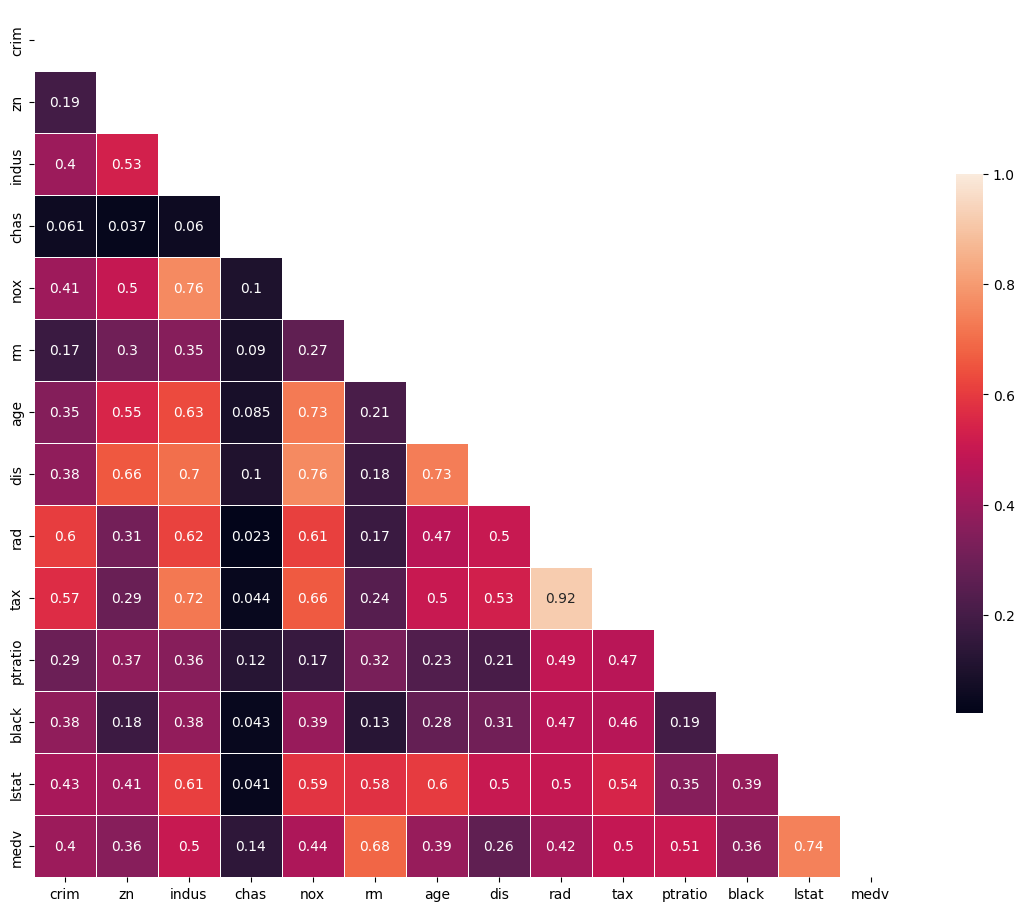

In [8]:
# Your plots here
import seaborn as sns

corr = np.abs(data.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14, 14))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

C:\Users\vi_to\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


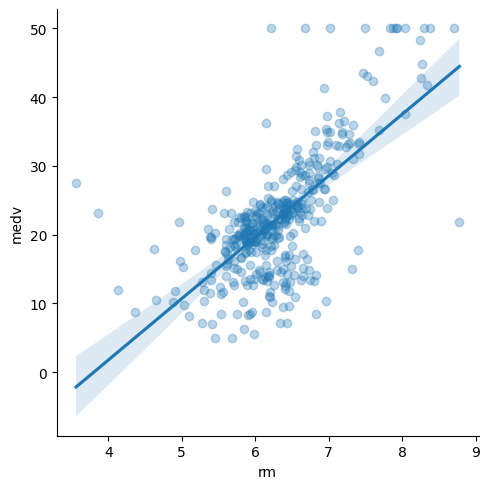

C:\Users\vi_to\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


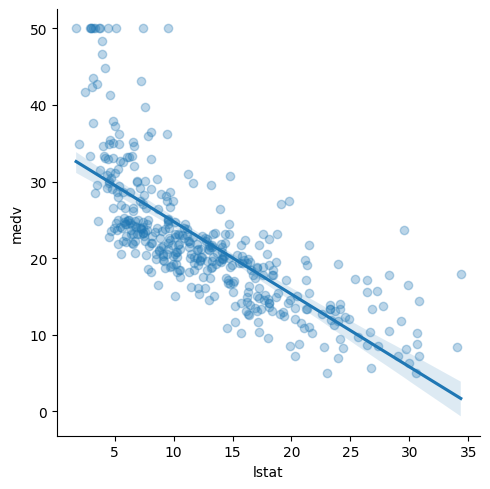

In [9]:
selected_variables = ["rm", "lstat"]

for variable in selected_variables:
    sns.lmplot(x = variable, y = "medv", data = data, scatter_kws = {"alpha":0.3})
    plt.ylabel("medv")
    plt.show()

C:\Users\vi_to\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


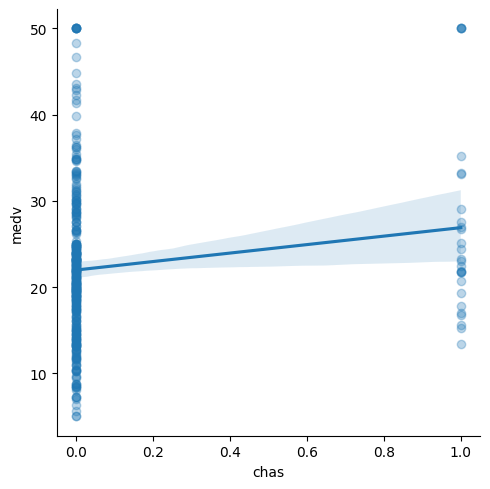

In [10]:
#worst correlated variable with the target

selected_variables = ["chas"]

for variable in selected_variables:
    sns.lmplot(x = variable, y = "medv", data = data, scatter_kws = {"alpha":0.3})
    plt.ylabel("medv")
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
#Just graphic shows the correlation between the variables showing the relationship

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

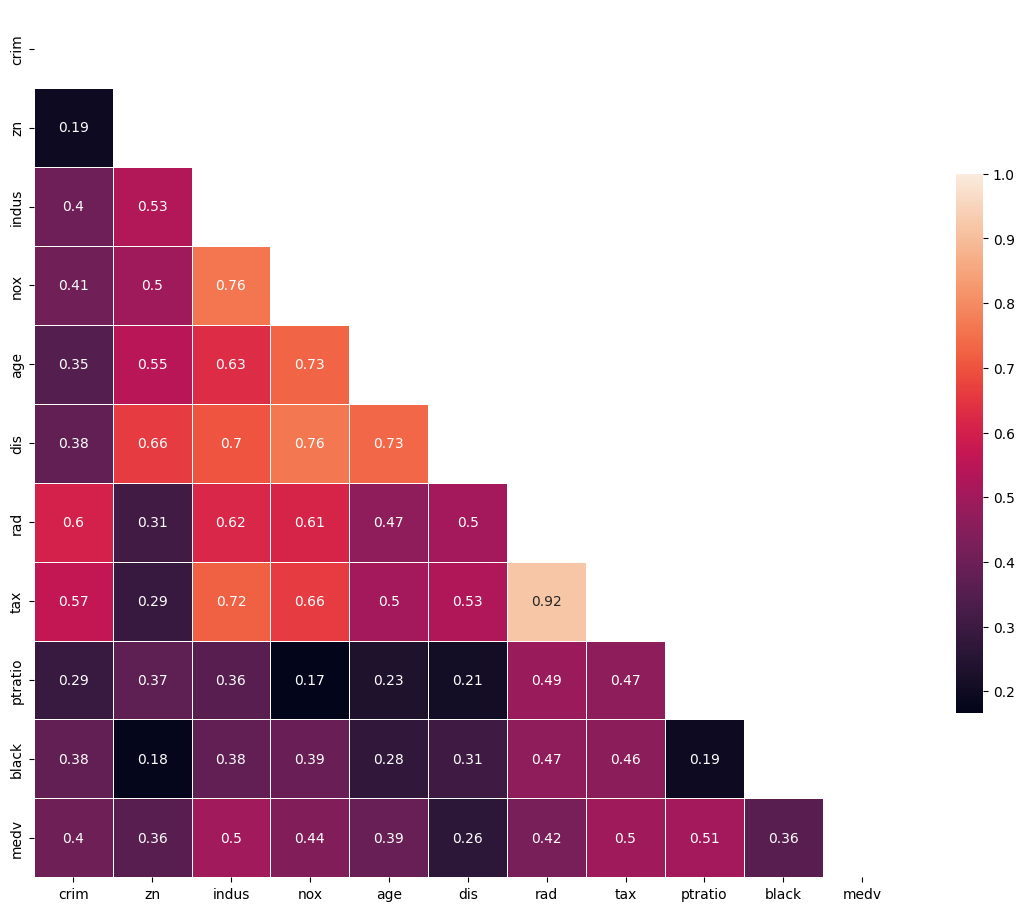

In [17]:
# Your response here
data_selected = data.drop(["chas","rm",'lstat'],axis=1)

corr = np.abs(data_selected.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14, 14))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [23]:
# Your code here
data['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [30]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [28]:
# Your code here
from sklearn.model_selection import train_test_split
features = data.drop('medv', axis=1)
target = data['medv']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [34]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
md = [2,4,6,8,10]

classifiers=[RandomForestRegressor(max_depth=i) for i in md]
for i in classifiers:
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(f'''Score:{i.score(X_test,y_test)},
r2_score:{performance_metric(y_test,y_pred)}''')



Score:0.7827695796513002,
r2_score:0.7827695796513002
Score:0.8339640600695397,
r2_score:0.8339640600695397
Score:0.8373424102029932,
r2_score:0.8373424102029932
Score:0.8372057381894611,
r2_score:0.8372057381894611
Score:0.8531205505113568,
r2_score:0.8531205505113568


Now, plot the score for each tree on the training set and on the testing set.

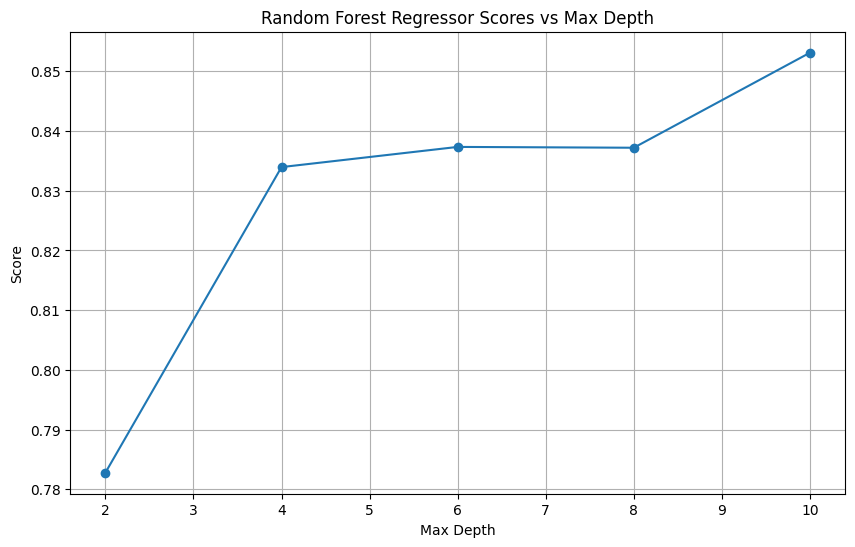

In [37]:
# Produce a plot with the score for the testing and training for the different max depths
plt.figure(figsize=(10, 6))
plt.plot(md, [i.score(X_test, y_test) for i in classifiers], marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Random Forest Regressor Scores vs Max Depth')
plt.grid(True)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
#The higher the max depth the better the score

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
#When with 1 max depth it has both, and with 10 it has overfitting

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [44]:
# Your response here
forest=RandomForestRegressor(max_depth=4)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
print(f'''Score:{forest.score(X_test,y_test)}''')
#It has the best score without overfitting

Score:0.8279208779265078


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
'''Its not the best data to use, considering the time,
can give a superficial overview,
It can make be better with some improvements
No, they had a lot of different aspects that affect the price of a house.'''